<a href="https://colab.research.google.com/github/yangchangnaihoby/AI_7th/blob/master/Day_045_NLP_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import nltk
nltk.download('treebank')

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


In [6]:
tagged_sentences = nltk.corpus.treebank.tagged_sents()
print("품사 태깅이 된 문장 개수 :", len(tagged_sentences))
tagged_sentences[0]

품사 태깅이 된 문장 개수 : 3914


[('Pierre', 'NNP'),
 ('Vinken', 'NNP'),
 (',', ','),
 ('61', 'CD'),
 ('years', 'NNS'),
 ('old', 'JJ'),
 (',', ','),
 ('will', 'MD'),
 ('join', 'VB'),
 ('the', 'DT'),
 ('board', 'NN'),
 ('as', 'IN'),
 ('a', 'DT'),
 ('nonexecutive', 'JJ'),
 ('director', 'NN'),
 ('Nov.', 'NNP'),
 ('29', 'CD'),
 ('.', '.')]

In [9]:
sentences, pos_tags = [], [] 
for tagged_sentence in tagged_sentences : # 3914개의 문장 샘플을 1개씩 불러온다.
    sentence, tag_info = zip(*tagged_sentence) # 각 샘플에서 단어들은 sentence에 품사 태깅 정보들은 tag_info에 저장한다.
    # zip 함수에를 사용하면 각 열끼리 데이터를 묶게 된다. 지금은 3914행 2열이기 때문에 결과가 두 개의 데이터가 나오게 되고 반복문에 의해 입력된다.
    sentences.append(list(sentence)) # 각 샘플에서 단어 정보만 저장한다.
    pos_tags.append(list(tag_info)) # 각 샘플에서 품사 태깅 정보만 저장한다.

In [10]:
[len(tagged_sentences[i]) for i in range(10)]
print('샘플의 최대 길이 : %d' % max(len(l) for l in sentences))
print('샘플의 평균 길이 : %f' % (sum(map(len, sentences)) / len(sentences))) # map(함수, 복수데이터)

샘플의 최대 길이 : 271
샘플의 평균 길이 : 25.722024


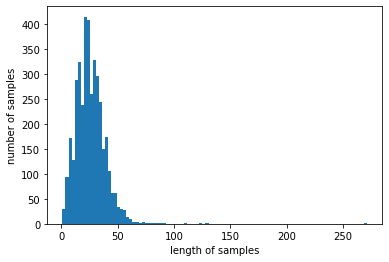

In [11]:
plt.hist(list(map(len, sentences)), bins = 100)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [19]:
def tokenize(samples) :
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(samples)
  return tokenizer

In [20]:
src_tokenizer = tokenize(sentences)
tar_tokenizer = tokenize(pos_tags)
vocab_size = len(src_tokenizer.word_index) + 1
tag_size = len(tar_tokenizer.word_index) + 1
print('단어 집합의 크기 : {}'.format(vocab_size))
print('태깅 정보 집합의 크기 : {}'.format(tag_size))

단어 집합의 크기 : 11388
태깅 정보 집합의 크기 : 47


In [21]:
X_train = src_tokenizer.texts_to_sequences(sentences)
y_train = tar_tokenizer.texts_to_sequences(pos_tags)

In [22]:
max_len = 100
X_train = pad_sequences(X_train, padding = 'post', maxlen = max_len)
y_train = pad_sequences(y_train, padding = 'post', maxlen = max_len)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 777)
print('훈련 샘플 문장의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (3131, 100)
훈련 샘플 레이블의 크기 : (3131, 100)
테스트 샘플 문장의 크기 : (783, 100)
테스트 샘플 레이블의 크기 : (783, 100)


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding
from tensorflow.keras.optimizers import Adam

embedding_dim = 128
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, mask_zero = True))
model.add(Bidirectional(LSTM(hidden_units, return_sequences = True)))
model.add(TimeDistributed(Dense(tag_size, activation = 'softmax')))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(0.001), metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 128, epochs = 7, validation_data = (X_test, y_test))

Epoch 1/7
25/25 [==============================] - 32s 953ms/step - loss: 0.8862 - accuracy: 0.1541 - val_loss: 0.7680 - val_accuracy: 0.1618
Epoch 2/7
25/25 [==============================] - 21s 841ms/step - loss: 0.7514 - accuracy: 0.2002 - val_loss: 0.7169 - val_accuracy: 0.2473
Epoch 3/7
25/25 [==============================] - 21s 839ms/step - loss: 0.6742 - accuracy: 0.3597 - val_loss: 0.5926 - val_accuracy: 0.4668
Epoch 4/7
25/25 [==============================] - 21s 841ms/step - loss: 0.4993 - accuracy: 0.5225 - val_loss: 0.3958 - val_accuracy: 0.6090
Epoch 5/7
25/25 [==============================] - 23s 921ms/step - loss: 0.3169 - accuracy: 0.7072 - val_loss: 0.2468 - val_accuracy: 0.7868
Epoch 6/7
25/25 [==============================] - 21s 846ms/step - loss: 0.1834 - accuracy: 0.8606 - val_loss: 0.1531 - val_accuracy: 0.8731
Epoch 7/7
25/25 [==============================] - 21s 839ms/step - loss: 0.1059 - accuracy: 0.9214 - val_loss: 0.1091 - val_accuracy: 0.9026


In [25]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

25/25 [==============================] - 3s 100ms/step - loss: 0.1091 - accuracy: 0.9026

 테스트 정확도: 0.9026
